In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/Titanic_train.csv')
dados.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x = pd.crosstab(dados.Survived,dados.Sex)
x

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
xa = np.array(x)

In [ ]:
y1p = xa[0,0] + xa[0,1]
y2p = xa[1,0] + xa[1,1]
yp1 = xa[0,0] + xa[1,0]
yp2 = xa[0,1] + xa[1,1]
ypp = y1p + y2p

print(y1p,y2p,yp1,yp2,ypp)

y11e = (y1p * yp1) / ypp
y12e = (y1p * yp2) / ypp
y21e = (y2p * yp1) / ypp
y22e= (y2p * yp2) / ypp

y11 = xa[0,0]
y12 = xa[0,1]
y21 = xa[1,0]
y22 = xa[1,1]

print("Perfis Observados: ",y1p,y2p,yp1,yp2,"\n Valores Observados: ",y11,y12,y21,y22,"\n Valores Esperados: ",y11e.round(2) ,y12e.round(2),y21e.round(2),y22e.round(2))

549 342 314 577 891
Perfis Observados:  549 342 314 577 
 Valores Observados:  81 468 233 109 
 Valores Esperados:  193.47 355.53 120.53 221.47


In [ ]:
estatistica_quiquadrado_par = (((y11 - y11e) ** 2)/y11e) + (((y12 - y12e) ** 2)/y12e) + (((y21 - y21e) ** 2)/y21e) + (((y22 - y22e) ** 2)/y22e)
estatistica_quiquadrado_par

263.05057407065567

In [ ]:
difs = []
for i in range(10000):
    amostra = dados["Survived"].sample(n=577, replace=False)
    difs.append(amostra.mean() - dados["Survived"].drop(amostra.index).mean())
med = np.array(difs).mean()

print("Média das diferenças:", med,"\n Diferenças:" , difs)

In [ ]:
est = []
for i in range(100):
  g1 = dados["Survived"].sample(n=577, replace=False) # 577 (qtd homens) aleatórios
  g2 = dados["Survived"].drop(amostra.index) # 314 (qtd mulheres) aleatórios
  grupos = np.array(["g1", "g2"])
  grupos = np.repeat(grupos, [577, 314], axis=0)
  col1 = pd.concat([g1,g2])
  col2 = grupos
  d = {'col1': col1, 'col2': col2}
  d = pd.DataFrame(data=d)
  x = pd.crosstab(d.col1,d.col2)
  xa = np.array(x)
  y1p = xa[0,0] + xa[0,1]
  y2p = xa[1,0] + xa[1,1]
  yp1 = xa[0,0] + xa[1,0]
  yp2 = xa[0,1] + xa[1,1]
  ypp = y1p + y2p
  y11e = (y1p * yp1) / ypp
  y12e = (y1p * yp2) / ypp
  y21e = (y2p * yp1) / ypp
  y22e= (y2p * yp2) / ypp
  y11 = xa[0,0]
  y12 = xa[0,1]
  y21 = xa[1,0]
  y22 = xa[1,1]
  estatistica_quiquadrado = (((y11 - y11e) ** 2)/y11e) + (((y12 - y12e) ** 2)/y12e) + (((y21 - y21e) ** 2)/y21e) + (((y22 - y22e) ** 2)/y22e)
  est.append(estatistica_quiquadrado)
maximo = np.array(est).max()
media =  np.array(est).mean()
min =  np.array(est).min()

print("Maior estatística Qui-quadrado aleatória encontrada: ",maximo,"\n Média das estatísticas Qui-quadrado aleatórias encontrada: ", media, "\n Menor estatística Qui-quadrado aleatória encontrada: ", min, "\n Valor da estatística encontrado para mulheres x homens", estatistica_quiquadrado_par)

## Dividir os dados aleatoriamente, em 2;
## Ver a proporção de sobreviventes, para saber se independe do sexo
## Ver a proporção de sexo, para saber se independe de sobrevivência (?)

# Diferença da proporção de sobrevivência entre homens e mulheres:

In [ ]:
valores = dados.groupby("Sex")["Survived"].mean()
dif = data.groupby("Sex")["Survived"].mean()[0] - data.groupby("Sex")["Survived"].mean()[1]
print("Proporção:", valores, "\n Diferença:", dif)

Proporção: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 
 Diferença: 0.5531300709799203


# Diferenças entre grupos aleatórios:

In [ ]:
difs = []
for i in range(10000):
    amostra = dados["Survived"].sample(n=577, replace=False)
    difs.append(amostra.mean() - dados["Survived"].drop(amostra.index).mean())
med = np.array(difs).mean()

print("Média das diferenças:", med,"\n Diferenças:" , difs)

Média das diferenças: -0.000424640960823066 
 Diferenças: [-0.03184161432403493, -0.012170351808718505, -0.012170351808718505, -0.017088167437547652, -0.002334720551060321, 0.002583095077768771, 0.017336541964256158, -0.026923798695205836, -0.036759429952864076, 0.09110377639669276, -0.03184161432403493, -0.04659506121052226, 0.05176125136605991, -0.007252536179889413, 0.03700780447957258, -0.026923798695205836, -0.012170351808718505, -0.03184161432403493, -0.012170351808718505, -0.002334720551060321, -0.04659506121052226, 0.05176125136605991, -0.026923798695205836, -0.03184161432403493, 0.017336541964256158, -0.002334720551060321, 0.027172173221914397, 0.017336541964256158, 0.002583095077768771, 0.017336541964256158, 0.04684343573723082, -0.04659506121052226, -0.04659506121052226, -0.002334720551060321, 0.002583095077768771, 0.01241872633542701, -0.0564306924681805, 0.022254357593085305, 0.01241872633542701, 0.04192562010840173, -0.012170351808718505, -0.06134850809700959, 0.051761251

# Histograma da densidade das diferenças de proporções entre grupos aleatórios:

<Axes: ylabel='Count'>

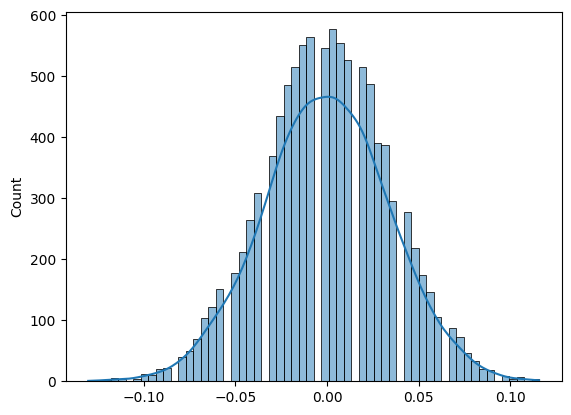

In [ ]:
sns.histplot(difs,kde=True)

# Intervalo de confiança:

In [ ]:
np.quantile(difs,[.025,.975])

array([-0.06626632,  0.0665147 ])

# P-valor:

In [ ]:
(np.array(difs) > 0.5531300709799203).mean()

0.0

# Conclusão: Variáveis não são independentes. Ou seja, existe relação entre o sexo do tripulante, e o fato de ter sobrevivido ou não.